### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [22]:
data = pd.read_csv('https://raw.githubusercontent.com/maniliy07/Module5/refs/heads/main/coupons.csv')

In [26]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [18]:
# Check unique coupon types
coupon_types = data['coupon'].unique()
print(f"\nCoupon types:\n{coupon_types}")


Coupon types:
['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']


2. Investigate the dataset for missing or problematic data.

In [19]:
# Check for missing values
missing_values = data.isnull().sum()
print(f"\nMissing values per column:\n{missing_values[missing_values > 0]}")


Missing values per column:
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

Missing values per column:
Bar                       107 #categorical, So repolacing it mode value with null value
CoffeeHouse               217  # categorical, So repolacing it mode value with null value
CarryAway                 151 # categorical, So repolacing it mode value with null value
RestaurantLessThan20      130 # categorical, So repolacing it mode value with null value
Restaurant20To50          189 # categorical, So repolacing it mode value with null value

In [ ]:
# Fill missing values in 'Bar' column with the mode

mode_bar = data['Bar'].mode()[0]

data['Bar'] = data['Bar'].fillna(mode_bar)

# Fill missing values in 'CoffeeHouse' column with the mode

mode_CoffeeHouse = data['CoffeeHouse'].mode()[0]

data['CoffeeHouse'] = data['CoffeeHouse'].fillna(mode_CoffeeHouse)

# Fill missing values in 'RestaurantLessThan20' column with the mode
mode_RestaurantLessThan20 = data['RestaurantLessThan20'].mode()[0]

data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna(mode_RestaurantLessThan20)

#   
mode_Restaurant20To50 = data['Restaurant20To50'].mode()[0]

data['Restaurant20To50'] = data['Restaurant20To50'].fillna(mode_Restaurant20To50)

# Fill missing values in 'CarryAway' column with the mode
mode_CarryAway = data['CarryAway'].mode()[0]

data['CarryAway'] = data['CarryAway'].fillna(mode_CarryAway)
    
# Drop the 'car' column
#data = data.drop(columns=['car'])

# Validate for missing values
missing_values = data.isnull().sum()
print(f"\nValidate Missing values per column:\n{missing_values[missing_values > 0]}")



Missing values per column:
Series([], dtype: int64)


4. What proportion of the total observations chose to accept the coupon?



In [42]:
# Acceptance rate by coupon type
acceptance_by_coupon = data.groupby('coupon')['Y'].mean().sort_values(ascending=False)
print("Acceptance rate by coupon type:")
print(acceptance_by_coupon)

Acceptance rate by coupon type:
coupon
Carry out & Take away    0.735478
Restaurant(<20)          0.707107
Coffee House             0.499249
Restaurant(20-50)        0.441019
Bar                      0.410015
Name: Y, dtype: float64


5. Use a bar plot to visualize the `coupon` column.

Overall Acceptance Rate: 56.84%


C:\Users\test\AppData\Local\Temp\ipykernel_6376\2522414142.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=acceptance_by_coupon.index, y=acceptance_by_coupon.values, palette='viridis')


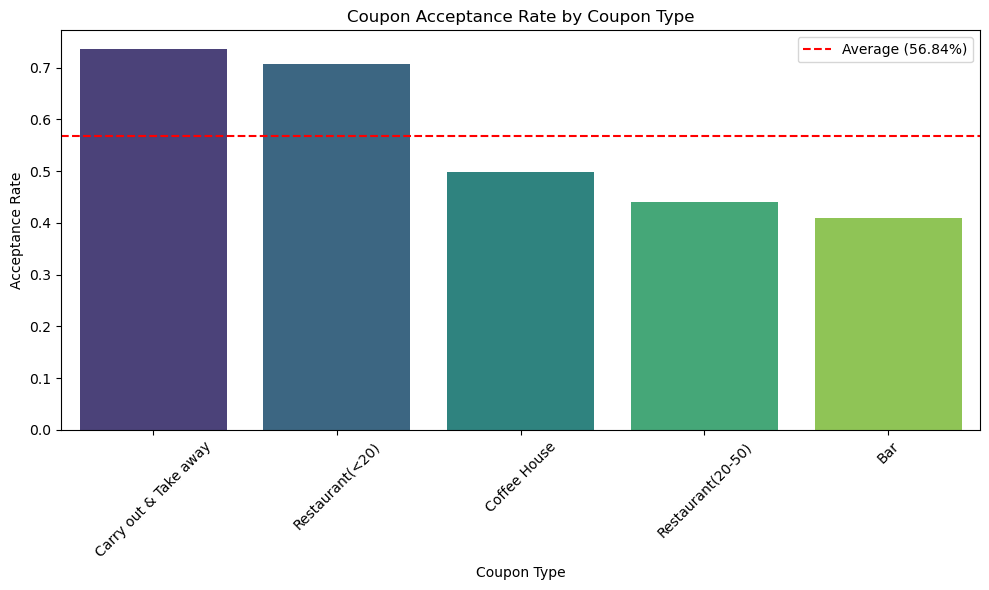

In [57]:
# Overall acceptance rate
overall_acceptance = data['Y'].mean()
print(f"Overall Acceptance Rate: {overall_acceptance:.2%}")

# Visualize Acceptance Rate by Coupon Type
plt.figure(figsize=(10, 6))
sns.barplot(x=acceptance_by_coupon.index, y=acceptance_by_coupon.values, palette='viridis')
plt.title('Coupon Acceptance Rate by Coupon Type')
plt.ylabel('Acceptance Rate')
plt.xlabel('Coupon Type')
plt.xticks(rotation=45)
plt.axhline(overall_acceptance, color='red', linestyle='--', label=f'Average ({overall_acceptance:.2%})')
plt.legend()
plt.tight_layout()
plt.savefig('acceptance_by_coupon.png')


6. Use a histogram to visualize the temperature column.


Acceptance Rate by Weather:
weather
Sunny    0.594796
Snowy    0.470463
Rainy    0.462810
Name: Y, dtype: float64

Acceptance Rate by Temperature:
temperature
80    0.600337
55    0.536719
30    0.531088
Name: Y, dtype: float64


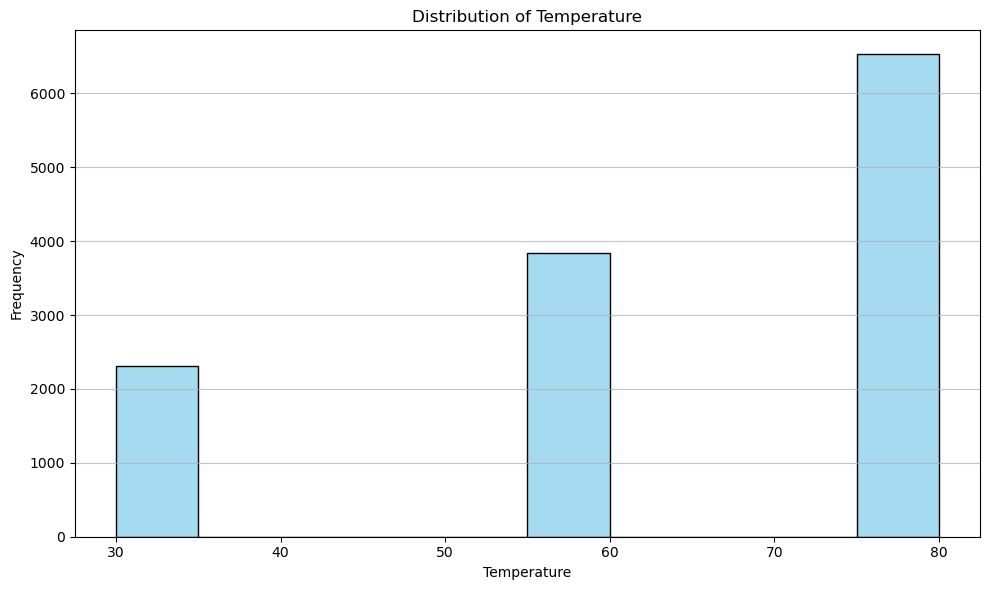

In [ ]:
# Create a histogram for the temperature column
plt.figure(figsize=(10, 6))
sns.histplot(data['temperature'], bins=10, kde=False, color='skyblue', edgecolor='black')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.savefig('temperature_histogram.png')

In [63]:
# Environmental Analysis: Weather and Temperature
weather_acceptance = data.groupby('weather')['Y'].mean().sort_values(ascending=False)

print("\nAcceptance Rate by Weather:")
print(weather_acceptance)



Acceptance Rate by Weather:
weather
Sunny    0.594796
Snowy    0.470463
Rainy    0.462810
Name: Y, dtype: float64


In [62]:
temp_acceptance = data.groupby('temperature')['Y'].mean().sort_values(ascending=False)
print("\nAcceptance Rate by Temperature:")
print(temp_acceptance)


Acceptance Rate by Temperature:
temperature
80    0.600337
55    0.536719
30    0.531088
Name: Y, dtype: float64


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [ ]:
# Create a new DataFrame containing just the bar coupons
bar_data = data[data['coupon'] == 'Bar'].copy()

# Save the filtered DataFrame to a CSV file
bar_data.to_csv('bar_coupons.csv', index=False)

# Display the first few rows and basic info of the bar_df
print("Bar Coupons DataFrame Info:")
print(bar_data.info())
print("\nFirst few rows of bar_df:")
print(bar_data.head())

Bar Coupons DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 9 to 12682
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   destination           2017 non-null   object  
 1   passanger             2017 non-null   object  
 2   weather               2017 non-null   object  
 3   temperature           2017 non-null   int64   
 4   time                  2017 non-null   object  
 5   coupon                2017 non-null   object  
 6   expiration            2017 non-null   object  
 7   gender                2017 non-null   object  
 8   age                   2017 non-null   object  
 9   maritalStatus         2017 non-null   object  
 10  has_children          2017 non-null   int64   
 11  education             2017 non-null   object  
 12  occupation            2017 non-null   object  
 13  income                2017 non-null   object  
 14  Bar                   2017 non-n

2. What proportion of bar coupons were accepted?


In [66]:
# Calculate the proportion of bar coupons that were accepted
bar_acceptance_rate = bar_data['Y'].mean()
print(f"Proportion of bar coupons accepted: {bar_acceptance_rate:.4f}")

Proportion of bar coupons accepted: 0.4100


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [70]:
# Check unique values in the 'Bar' column to identify groupings
print("Unique values in Bar column:", bar_data['Bar'].unique())

# Define group: 3 or fewer times a month ('never', 'less1', '1~3')
group_3_or_less = ['never', 'less1', '1~3']
# Define group: more than 3 times a month ('4~8', 'gt8')
group_more_than_3 = ['4~8', 'gt8']

# Filter bar_df for these groups
rate_3_or_less = bar_data[bar_data['Bar'].isin(group_3_or_less)]['Y'].mean()
rate_more_than_3 = bar_data[bar_data['Bar'].isin(group_more_than_3)]['Y'].mean()

print(f"Acceptance rate for those who went to a bar 3 or fewer times a month: {rate_3_or_less:.4f}")
print(f"Acceptance rate for those who went to a bar more than 3 times a month: {rate_more_than_3:.4f}")

Unique values in Bar column: ['never' 'less1' '1~3' 'gt8' '4~8']
Acceptance rate for those who went to a bar 3 or fewer times a month: 0.3707
Acceptance rate for those who went to a bar more than 3 times a month: 0.7688


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [73]:
# Check unique age values to define "over 25" correctly
print("Unique age values:", bar_data['age'].unique())

# Define criteria for Group 1: Bar visits > 1 per month and Age > 25
over_1_bar = ['1~3', '4~8', 'gt8']
over_25_age = ['26', '31', '36', '41', '46', '50plus']

# Create logic for Group 1
group_1_mask = (bar_data['Bar'].isin(over_1_bar)) & (bar_data['age'].isin(over_25_age))
group_1_acceptance = bar_data[group_1_mask]['Y'].mean()

# Create logic for Group 2 (All others)
group_2_acceptance = bar_data[~group_1_mask]['Y'].mean()

print(f"Acceptance rate for Group 1 (Bar > 1/month, Age > 25): {group_1_acceptance:.4f}")
print(f"Acceptance rate for all others: {group_2_acceptance:.4f}")
print(f"Difference: {group_1_acceptance - group_2_acceptance:.4f}")

Unique age values: ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
Acceptance rate for Group 1 (Bar > 1/month, Age > 25): 0.6952
Acceptance rate for all others: 0.3350
Difference: 0.3602


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [74]:
# Check unique values for passenger and occupation to ensure correct filtering
print("Unique passenger values:", bar_data['passanger'].unique())
print("Unique occupation values:", bar_data['occupation'].unique())

# Define criteria for Group 1
over_1_bar = ['1~3', '4~8', 'gt8']
not_kid = bar_data['passanger'] != 'Kid(s)'
not_farming = bar_data['occupation'] != 'Farming Fishing & Forestry'

# Logic for Group 1
group_1_mask = (bar_data['Bar'].isin(over_1_bar)) & (not_kid) & (not_farming)
group_1_acceptance = bar_data[group_1_mask]['Y'].mean()

# Logic for Group 2 (All others)
group_2_acceptance = bar_data[~group_1_mask]['Y'].mean()

print(f"\nAcceptance rate for Group 1 (Bar > 1/month, No Kid passengers, Not Farming/Fishing/Forestry): {group_1_acceptance:.4f}")
print(f"Acceptance rate for all others: {group_2_acceptance:.4f}")
print(f"Difference: {group_1_acceptance - group_2_acceptance:.4f}")

Unique passenger values: ['Kid(s)' 'Alone' 'Friend(s)' 'Partner']
Unique occupation values: ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Installation Maintenance & Repair' 'Transportation & Material Moving'
 'Business & Financial' 'Protective Service'
 'Food Preparation & Serving Related' 'Production Occupations'
 'Building & Grounds Cleaning & Maintenance' 'Farming Fishing & Forestry']

Acceptance rate for Group 1 (Bar > 1/month, No Kid passengers, Not Farming/Fishing/Forestry): 0.7132
Acceptance rate for all others: 0.2960
Difference: 0.4172


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [76]:
# Define mappings for conditions
bar_over_1 = ['1~3', '4~8', 'gt8']
age_under_30 = ['below21', '21', '26']
restaurant_over_4 = ['4~8', 'gt8']
income_under_50k = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']

# Condition 1: (Bar > 1) AND (Passenger != Kid(s)) AND (MaritalStatus != Widowed)
cond1 = (bar_data['Bar'].isin(bar_over_1)) & (bar_data['passanger'] != 'Kid(s)') & (bar_data['maritalStatus'] != 'Widowed')

# Condition 2: (Bar > 1) AND (Age < 30)
cond2 = (bar_data['Bar'].isin(bar_over_1)) & (bar_data['age'].isin(age_under_30))

# Condition 3: (RestaurantLessThan20 > 4) AND (Income < 50K)
cond3 = (bar_data['RestaurantLessThan20'].isin(restaurant_over_4)) & (bar_data['income'].isin(income_under_50k))

# Combine conditions with OR
group_1_mask = cond1 | cond2 | cond3

# Calculate acceptance rates
group_1_acceptance = bar_data[group_1_mask]['Y'].mean()
group_2_acceptance = bar_data[~group_1_mask]['Y'].mean()

print(f"\nAcceptance rate for Group 1 (Combined Criteria): {group_1_acceptance:.4f}")
print(f"Acceptance rate for all others: {group_2_acceptance:.4f}")
print(f"Difference: {group_1_acceptance - group_2_acceptance:.4f}")


Acceptance rate for Group 1 (Combined Criteria): 0.5889
Acceptance rate for all others: 0.2981
Difference: 0.2908


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the data analysis, several key hypotheses emerge regarding the characteristics of drivers who accept bar coupons:

1. Behavioral Habit is the Primary Driver
The strongest predictor for accepting a bar coupon is the driver's existing habit. Drivers who visit bars more than three times a month accepted coupons at a rate of 76.88%, compared to only 37.06% for those who go less frequently.

Hypothesis: Bar coupons do not necessarily "create" new customers from non-bar-goers; instead, they are highly effective at incentivizing existing customers to visit again or perhaps choose a specific venue over another.

2. Social Context and Life Stage
Drivers without children in the car and those who are not widowed showed significantly higher acceptance rates. Furthermore, the combination of being a frequent bar-goer and being over the age of 25 (69.52%) or under the age of 30 (as part of the combined group) indicates a "socially active" demographic.

Hypothesis: The "Bar" coupon is viewed as a social/leisure tool. The presence of children acts as a logistical barrier to acceptance, while younger or socially active adults are more likely to view the coupon as an opportunity for a planned or spontaneous social outing.

3. The "Value-Seeking Socializer" Profile
The analysis showed that individuals who frequent cheap restaurants (more than 4 times a month) and have lower incomes (<$50k) also show a higher propensity to accept bar coupons.

Hypothesis: There is a specific segment of the population that is price-sensitive but socially active. These individuals are motivated by "value" and are more likely to utilize coupons to maintain their social lifestyle while staying within a budget.

4. Occupational and Demographic Stability
Drivers in professions like farming, fishing, or forestry were less likely to accept these coupons.

Hypothesis: Urban or office-based workers may have more access to bars or a social culture that revolves around "happy hours" compared to those in more rural or physically demanding manual labor occupations, making them a more receptive target for bar-related marketing.

Summary Hypothesis
The ideal candidate for a bar coupon is a regular bar-goer, likely between the ages of 21 and 35, who is currently driving without children and possesses a lifestyle that already incorporates frequent social dining (even at cheaper venues). Marketing efforts are most effective when targeting people based on their existing routines rather than trying to convert those who rarely visit such establishments.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  


Acceptance Rate by Gender:
gender
Female    0.547228
Male      0.590799
Name: Y, dtype: float64


C:\Users\test\AppData\Local\Temp\ipykernel_6376\773599750.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_acceptance.index, y=age_acceptance.values, palette='magma')


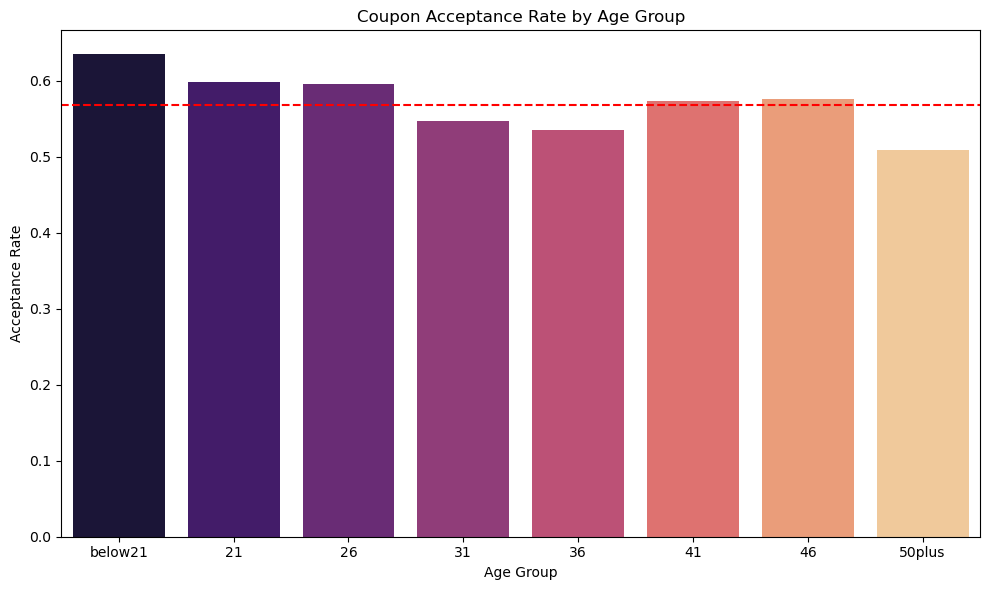

In [58]:
# Demographics Analysis: Gender and Age
gender_acceptance = data.groupby('gender')['Y'].mean()
print("\nAcceptance Rate by Gender:")
print(gender_acceptance)

age_order = ['below21', '21', '26', '31', '36', '41', '46', '50plus']
data['age_cat'] = pd.Categorical(data['age'], categories=age_order, ordered=True)
age_acceptance = data.groupby('age_cat', observed=True)['Y'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=age_acceptance.index, y=age_acceptance.values, palette='magma')
plt.title('Coupon Acceptance Rate by Age Group')
plt.ylabel('Acceptance Rate')
plt.xlabel('Age Group')
plt.axhline(overall_acceptance, color='red', linestyle='--')
plt.tight_layout()
plt.savefig('acceptance_by_age.png')